In [1]:
import numpy as np
import os
os.chdir("../")
import ppa
import matplotlib.pyplot as plt
import scipy.linalg as sl
from numpy import nan,inf
import scipy.constants as sc
import scipy.interpolate as si
import matplotlib as mpl
import glob
from astropy.time import Time
np.set_printoptions(precision=10)
import matplotlib
plt.rc('font',**{'family':'serif','serif':['Times']})
mpl.rcParams['font.size'] = 13
#mpl.rcParams['font.family'] = 'serif'
#mpl.rcParams['font.sans-serif'] = ['DejaVu Sans']
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['patch.linewidth'] = 1

# Changing this will affect the size of the plot in Jupyter notebook as well as resolution of the final PDF. Can change later
plt.rcParams['figure.dpi'] = 100

#mpl.rcParams['mathtext.fontset'] = 'custom'
#mpl.rcParams['mathtext.rm'] = 'Serif'
#mpl.rcParams['mathtext.it'] = 'Serif:italic'
#mpl.rcParams['mathtext.bf'] = 'Serif:bold'

# tick parameters:
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True


mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.direction'] = 'in'
    
mpl.rcParams['xtick.major.size'] = 6  # default 3.5
mpl.rcParams['ytick.major.size'] = 6  # default 3.5
mpl.rcParams['xtick.minor.size'] =  3  # default 2 
mpl.rcParams['ytick.minor.size'] = 3  # default 2 
    
mpl.rcParams['xtick.major.width'] = 1  # default 0.8
mpl.rcParams['ytick.major.width'] = 1  # default 0.8
mpl.rcParams['xtick.minor.width'] =1  # default 0.6
mpl.rcParams['ytick.minor.width'] = 1  # default 0.6
mpl.rcParams['text.usetex'] = True


MASS_TO_FREQ = sc.eV / sc.h
def plot_timescales( ax,ymin,ymax,Tyr=18.1,annotate=True):

    l10ma_T = np.log10( 1/(1.0*sc.day*1 * MASS_TO_FREQ) )
    ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls=":")
    if annotate==True:
        ax.annotate(r"1 day",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")
    
    # l10ma_T = np.log10( 1/(1.0*sc.day*14 * MASS_TO_FREQ) )
    # ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls="-")
    # if annotate==True:
    #     ax.annotate(r"2 weeks",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")

    l10ma_T = np.log10( 1/(1.0*sc.year * MASS_TO_FREQ) )
    ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls=":")
    if annotate==True:
        ax.annotate(r"1 year",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")

    l10ma_T = np.log10( 1/(11.0*sc.year * MASS_TO_FREQ) )
    ax.plot([l10ma_T ,l10ma_T ],[ymin,ymax],'gray',ls=":")
    if annotate==True:
        ax.annotate(r"Solar Cycle",xy = [l10ma_T ,ymax],va = "top",rotation=-90,color="dimgray")

    l10ma_T = np.log10( 1/(Tyr*sc.year * MASS_TO_FREQ) )
    ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls="-")
    if annotate==True:
        ax.annotate(r"T$_{\rm obs}$",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")


#rho = 7.68351e-6 * 0.40 #0.46
rho = (0.4 * 1e9 * 100**3) * sc.c**3  * sc.hbar**3 / sc.eV**3
l10S_to_l10ga = lambda l10S,l10ma: l10S+9+l10ma-np.log10(rho)/2


def make_ul_plot(ax,l10ma , ul_auto,ul_full ):
    #fig , ax = plt.subplots(figsize=(5,4))
    #ax.set_title("95% UL (Bayesian approach)")
    #ax.fill_between(np.log10(PPTA_QUIJOTE[:,0]),np.log10(PPTA_QUIJOTE[:,1]),np.zeros(len(PPTA_QUIJOTE)),alpha=0.5,fc='darkgreen',label="PPTA-QUIJOTE")


    _l10ma = np.linspace(-24,-18.5,101)
    #Chandra
    ax.plot(_l10ma,np.log10(5e-13)*np.ones(len(_l10ma)),color="black",ls='--')
    ax.annotate("Chandra\n H1821+643",xy=(-18.5-0.05,np.log10(5e-13)-0.1),size=12,va="top",ha="right")

    #Planck
    ax.plot(_l10ma,_l10ma+9,color="black",ls=':',lw=2)
    ax.annotate("Planck",xy=(-19.3,-10.5),size=14,va="top",ha="right",rotation="25")


    try:
        ax.plot(l10ma ,l10S_to_l10ga(ul_full,l10ma),'.',color='blue')
        ax.plot(l10ma ,l10S_to_l10ga(ul_full,l10ma),'-',color='blue',label="Full-corr")
    except:
        pass


    try:
        ax.plot(l10ma ,l10S_to_l10ga(ul_auto,l10ma),'.',color='red')
        ax.plot(l10ma ,l10S_to_l10ga(ul_auto,l10ma),'-',color='red',label="Auto-corr")
    except:
        pass



    ax.set_xlim(-23.5,-18.5)
    ymin = -16
    ymax = -6
    ax.set_ylim(ymin,ymax)
    #plt.title(r"the 95% upper limit on $\log_{\rm 10}g_{a\gamma\gamma}/{\rm GeV}^{-1}$"+
    #          "\n assuming local DM density " + r"$0.40 {\rm GeV}/{\rm cm}^3$")

    ax.legend(loc=4,prop={'size': 10})

    plot_timescales( ax,ymin,ymax,annotate=True)


    #ax.plot(mock[:,0] , l10S_to_l10ga(mock[:,2],mock[:,0]),'red' )

    #plot_timescales(ax,ymin,ymax)

    ax.set_xlabel(r"$\log_{\rm 10}m_a /{\rm eV}$")
    ax.set_ylabel(r"$\log_{\rm 10}g_{a\gamma\gamma}/{\rm GeV}^{-1}$")
    ax.grid(axis="y")


def make_bf_plot(ax,l10ma,lbf_af,lbf_nf):

    #fig , ax = plt.subplots(figsize=(5,3))
    ymin = min( [np.nanmin(lbf_nf) , np.nanmin(lbf_af) ,-10]  )
    ymax = max( [np.nanmax(lbf_nf) , np.nanmax(lbf_af) , 15 ] )
    plot_timescales( ax,ymin,ymax,annotate=False)

    try:
        lbf_nf[lbf_nf==inf]=ymax
        lbf_nf[lbf_nf==-inf]=ymin
        ax.plot(l10ma,lbf_nf,'-',color='b',label="Full vs None")
        ax.plot(l10ma,lbf_nf,'.',color='b')
    except:
        pass

    try:
        lbf_af[lbf_af==inf]=ymax
        lbf_af[lbf_af==-inf]=ymin
        ax.plot(l10ma,lbf_af,'-',color='r',label="Full vs Auto")
        ax.plot(l10ma,lbf_af,'.',color='r')
    except:
        pass
    
    
    ax.set_ylim(ymin,ymax)
    ax.set_xlim(-23.5,-18.5)
    ax.plot([-23.5,-18.5],[0,0],lw=2,color="black")


    ax.set_xlabel(r"$\log_{\rm 10}m_a /{\rm eV}$")
    #ax.set_ylabel(r"$\ln $BF$^{\rm full}_{\rm auto}$")
    ax.set_ylabel(r"$\ln $BF")
    ax.grid(axis="y")
    ax.legend(loc=2,prop={'size': 10})

## Data IONFR

(-5.0, 15.0)

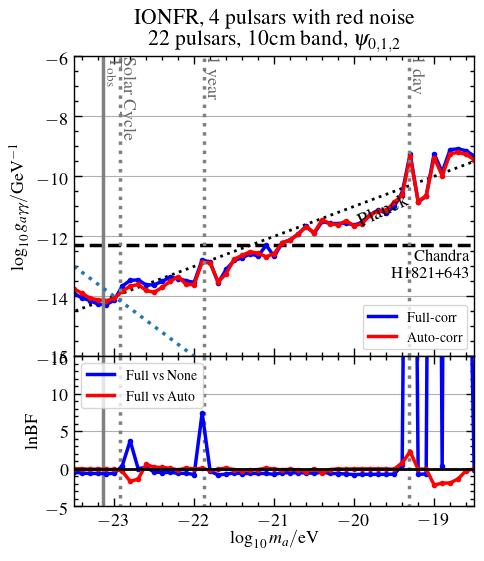

In [2]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5
ul_auto = np.array([-2.013, -2.256, -2.522, -2.672, -2.801, -2.827, -2.685, -2.621,
       -2.66 , -2.96 , -3.122, -3.056, -2.956, -2.9  , -3.258, -3.366,
       -2.711, -2.846, -3.574, -3.397, -3.021, -2.986, -2.969, -3.118,
       -3.337, -3.333, -3.066, -3.081, -2.968, -2.841, -3.136, -2.805,
       -3.033, -3.173, -3.138, -3.404, -3.428, -3.24 , -3.212, -3.294,
       -3.122, -2.987, -1.791, -3.395, -3.299, -2.13 , -2.833, -2.201,
       -2.259, -2.426, -2.697])



ul_full = np.array([-2.163, -2.411, -2.595, -2.823, -2.932, -2.886, -2.519, -2.423,
       -2.509, -2.777, -2.87 , -2.857, -2.818, -2.964, -3.137, -3.293,
       -2.637, -2.821, -3.602, -3.259, -3.061, -3.074, -3.036, -3.215,
       -2.95 , -3.427, -3.074, -3.075, -2.991, -2.814, -3.16 , -2.859,
       -3.026, -3.131, -3.206, -3.386, -3.383, -3.236, -3.183, -3.378,
       -3.26 , -2.9  , -1.703, -3.406, -3.324, -2.   , -2.717, -2.065,
       -2.14 , -2.305, -2.579])


make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("IONFR, 4 pulsars with red noise\n 22 pulsars, 10cm band,"+r" $\psi_{0,1,2}$")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 
lbf_nf = np.array([-0.451, -0.571, -0.613, -0.61 , -0.645, -0.603,  0.375,  3.741,
        0.019,  0.208, -0.418, -0.492, -0.462, -0.593, -0.591, -0.754,
          inf, -0.322, -0.801, -0.706, -0.533, -0.647, -0.612, -0.602,
       -0.616, -0.738, -0.506, -0.538, -0.517, -0.531, -0.594, -0.445,
       -0.613, -0.626, -0.688, -0.772, -0.725, -0.723, -0.725, -0.74 ,
       -0.698,  0.449,    inf, -0.749, -0.659,    inf,  0.434,    inf,
          inf,    inf, -0.211])

idx = np.array([16,42,45,47,48,49])
nn  = 13677.09
ff  = np.array([ 13660.077, 13797.323, 13837.615, 13879.881, 13813.663, 13734.615])
lbf_nf[idx] = ff-nn
lbf_nf[16] = np.log(4.3239)+6


lbf_af = np.array([-1.435e-02,  2.156e-02, -6.507e-02, -1.449e-02, -8.163e-02,
       -6.789e-02, -2.986e-01, -1.659e+00, -1.369e+00,  6.070e-01,
        2.069e-01,  1.954e-01,  7.758e-02, -1.525e-01,  1.085e-01,
       -1.017e-02,  5.499e-02, -1.884e-01, -7.531e-02,  1.289e-01,
       -1.103e-01, -2.215e-01, -1.419e-01, -1.013e-01,  1.102e-01,
       -4.290e-02, -1.187e-01, -5.773e-02, -1.342e-01, -3.702e-01,
        1.832e-02, -5.062e-01, -9.679e-02,  5.742e-03, -4.512e-02,
        7.290e-03, -4.154e-03, -4.606e-03,  4.435e-04, -1.131e-02,
       -5.512e-02,  8.089e-01,  2.290e+00, -7.004e-02, -1.116e-02,
       -2.158e+00, -1.902e+00, -1.887e+00, -1.332e+00, -2.329e-01,
       -7.880e-03])



make_bf_plot(axes[1],l10ma,lbf_af ,lbf_nf)

plt.ylim(-5,15)


In [3]:
crit = np.where(lbf_nf>20)[0]
np.array([crit,l10ma[crit],lbf_nf[crit]]).T
for c in crit:
    print(c,l10ma[c])


42 -19.3
45 -19.0
47 -18.8
48 -18.7
49 -18.6


## Data NO IONO

(-5.0, 35.0)

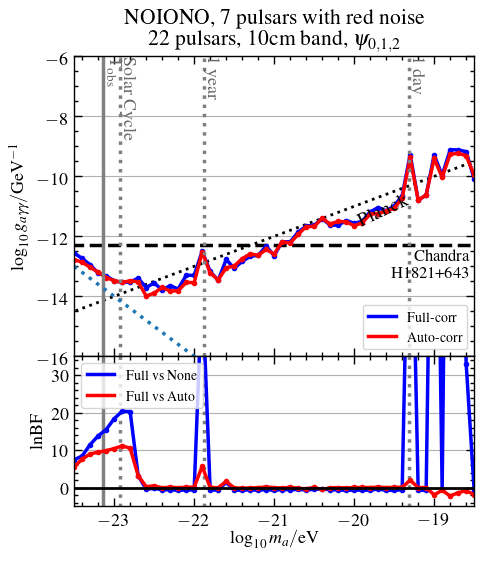

In [4]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5
ul_auto = np.array([-1.034, -1.219, -1.486, -1.753, -2.031, -2.233, -2.394, -2.435,
       -2.573, -3.148, -3.146, -3.058, -3.28 , -3.366, -3.191, -3.298,
       -2.381, -3.169, -3.511, -3.202, -3.248, -3.101, -3.042, -3.187,
       -3.094, -3.344, -3.038, -3.176, -2.988, -2.833, -2.924, -2.757,
       -3.043, -3.061, -3.17 , -3.403, -3.404, -3.218, -3.296, -3.317,
       -3.323, -3.084, -1.826, -3.352, -3.275, -2.159, -2.887, -2.216,
       -2.293, -2.463, -3.223])


ul_full = np.array([-0.812, -1.093, -1.404, -1.78 , -1.977, -2.237, -2.394, -2.476,
       -2.451, -2.864, -2.808, -3.145, -3.097, -3.312, -2.956, -3.055,
       -2.355, -3.125, -3.524, -2.927, -3.322, -3.192, -3.122, -3.188,
       -2.983, -3.398, -3.036, -3.139, -2.917, -2.81 , -2.892, -2.764,
       -3.081, -3.186, -3.129, -3.318, -3.359, -3.142, -3.095, -3.308,
       -3.243, -3.005, -1.729, -3.351, -3.284, -2.041, -2.824, -2.071,
       -2.172, -2.336, -3.345])




make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("NOIONO, 7 pulsars with red noise\n 22 pulsars, 10cm band,"+r" $\psi_{0,1,2}$")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 
lbf_nf = np.array([   inf,    inf,    inf,    inf,    inf,    inf,    inf,    inf,
        3.199, -0.449, -0.175, -0.606, -0.568, -0.729, -0.623, -0.652,
          inf, -0.587, -0.716,  0.918, -0.658, -0.73 , -0.548, -0.741,
       -0.509, -0.738, -0.512, -0.587, -0.488, -0.644, -0.438, -0.385,
       -0.542, -0.666, -0.717, -0.671, -0.685, -0.684, -0.376, -0.708,
       -0.734, -0.578,    inf, -0.73 , -0.725,    inf, -0.504,    inf,
          inf,    inf, -0.712])
lbf_nf[lbf_nf==np.inf]=100


lbf_af = np.array([ 5.514e+00,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,  3.204e+00,  2.420e-01,
        4.675e-01, -6.033e-02,  1.169e-01, -4.208e-02,  1.101e-01,
        1.116e-01,  5.651e+00,  3.136e-02, -4.070e-02,  1.684e+00,
       -6.921e-02, -1.391e-01, -1.131e-01, -3.014e-03,  1.640e-01,
       -7.544e-04, -1.275e-01,  1.120e-01, -1.757e-01, -3.072e-01,
        2.883e-02, -5.002e-01, -4.159e-02, -1.394e-03, -8.341e-02,
        2.829e-02,  2.857e-02,  1.688e-02,  1.319e-01,  5.305e-03,
        8.043e-02,  7.083e-02,  1.981e+00,  9.165e-03,  1.129e-02,
       -1.935e+00, -7.284e-01, -2.233e+00, -1.357e+00, -8.105e-01,
       -1.906e+00])


idx = np.array([0,1,2,3,4,5,6,7,16,42,45,47,48,49])
nn  = 13571.45
ff  = np.array([13575.36 , 13583.17 ,13583.66 , 13588.87 , 13586.71 , 13590.65\
                 , 13593.78 , 13595.16  , 13625.74 , 13672.12 , 13718.47 , 13770.57 , 13687.93 , 13604.52]) 
lbf_nf[idx] = ff - nn

idx = np.array([1,2,3,4,5,6,7])
aa = np.array([13570.06271602, 13572.99206179, 13576.93978279, 13574.44087492, 13573.43010664, 13582.1967153 , 13577.39340056])
lbf_af[idx] = aa - nn

lbf_af[[1,2,3,4,5,6,7]] = np.array([-1.399, -0.037,  0.455,  0.857,  1.409,  2.124,  1.505])+9


lbf_nf[19] = np.log(0.5740) + 2
lbf_af[19] = np.log(0.7099) + 2
lbf_nf[0]  = np.log(11.3115) + 5
lbf_nf[1]  = np.log(0.2075)  + 10
lbf_nf[2]  = np.log(4.4028)  + 10
lbf_nf[3]  = np.log(2.2029)  + 13
lbf_nf[4]  = np.log(0.5888) + 16
lbf_nf[5]  = np.log(0.5286) + 19
lbf_nf[6]  = np.log(3.9168) + 19
lbf_nf[7]  = np.log(3.4904) + 19
make_bf_plot(axes[1],l10ma,lbf_af ,lbf_nf)

plt.ylim(-5,35)

In [5]:
crit = np.where(lbf_af>20)[0]
np.array([crit,l10ma[crit],lbf_af[crit]]).T
for c in crit:
    print(c,l10ma[c])


# Single pulsar upper limit

In [9]:
res = [[-1.8754423909765747, -2.008463930362343, -2.232432193872767, -2.345060385036037, -2.545040024439354, -2.584340197670855, -2.2533652447747934, -1.8631488371376985, -2.369728624302488, -2.819466266331219, -2.985307055202482, -3.1349115941917876, -3.02805434776359, -2.900989044214976, -2.8929031812719592, -3.260307648451345, -2.167851353719722, -3.0681949722034108, -3.3738919431468264, -3.0438353184020417, -2.6742545032430605, -2.9261626071441693, -2.977920556511008, -2.9981944640675584, -3.1202665795228266, -3.2498855287775523, -2.5156112919051163, -2.5188867261457157, -2.766392198831088, -2.680585014511546, -2.864344742303851, -2.5695171455890145, -2.7886407740660806, -3.020750121154677, -3.1111428493017406, -3.3572926137399715, -3.41231623568916, -3.238516082315924, -3.2522718714933254, -3.2138016754239698, -3.2065834995480147, -2.478484794412876, -1.7457891322081946, -3.3604877779025353, -3.28032178674382, -1.8046179002158762, -2.1022450901329663, -1.8571314277856585, -2.000234081175754, -2.116702045637012, -1.8775775069432281], [-1.4897113668943072, -1.6275268264595344, -1.8174277523202027, -2.069312917534536, -2.0597701725448707, -2.0736067577675157, -1.8423161431992108, -1.7748030693956298, -1.8963317884360704, -2.1654554376766386, -2.2759449169998804, -2.273734296180772, -2.2184267164500433, -2.05971423392444, -2.100085139584815, -1.887112008387008, -2.1130745972028704, -1.4295726752432008, -1.8852603433726258, -1.8726668922783005, -2.2571853224695793, -2.0701350663502405, -1.8281220129851468, -2.1343204738818367, -1.6147405634259953, -1.989927189026884, -1.9139453904769703, -1.8800273308291053, -1.411337485010631, -1.791352430413795, -1.6949423369085552, -1.752555950928397, -1.879960220972892, -1.932478040906097, -1.7550777044425652, -1.6819952423278715, -1.8342178777451796, -1.9837012091115553, -1.6787324731950544, -2.024675235536854, -1.7638551612296034, -1.9895565980657468, -1.774342298115938, -1.7721245141655966, -1.939267052889416, -1.8314922243573901, -1.997545577986335, -1.930862752736327, -1.8870090730960525, -1.962346311577152, -1.99182388637442], [0.07773390592636087, -0.1292877139325388, -0.3792658024473145, -0.6329169359079864, -0.7589126863803073, -0.9312397266843401, -1.0523156591408342, -1.2754252916172273, -1.4758658013221195, -1.7337944765007245, -1.9062675643662466, -2.0745433042155956, -2.1664763663705116, -2.287101485672104, -2.4168071008302614, -2.212847200182526, -1.9101362878609027, -2.2471390042887056, -2.114924010215855, -2.0855392558961867, -1.6701118059321416, -2.164020454933542, -2.1661737574740347, -2.008687323603918, -1.826043822902673, -2.048563155066315, -1.8656752777079721, -2.1194609830614093, -2.064720492595534, -1.873907154069206, -1.8775009213322704, -2.1526626352221174, -1.7280593541336429, -2.0690030541915174, -1.9237630810427928, -2.00180385763972, -1.581206760817071, -1.8748274112457466, -1.889791686639625, -1.9783647745283868, -1.780640989857183, -1.7647741405620194, -1.895552364180021, -1.7512182029972105, -1.7690080466622686, -1.768199030905931, -1.6876488961233518, -1.852469181930223, -1.9291670896888704, -1.842595306793359, -1.755711151879261], [-1.4001395709057354, -1.6337931477572558, -1.761013774739756, -1.9739408798892808, -2.0509318526188007, -2.136054216363651, -2.2533151811292704, -2.2491846384995045, -2.0930509435092137, -1.9411020248642084, -2.1344896138421756, -2.352991893745765, -2.351388125144886, -2.3174471246364803, -1.8381888882731325, -1.932331001483068, -2.20320862085649, -2.078094908720301, -2.2444511465344816, -1.8576433839068391, -1.5274281769064975, -1.5479490806925713, -2.1289329770858547, -2.2202243632595033, -1.7219635595690128, -2.193587398222336, -2.1441649084126646, -1.9152866551311771, -2.074716431600941, -1.9354604147017187, -2.0485524922019405, -1.7334686048982666, -2.1156966068656664, -1.6194156135246196, -1.847554099421523, -2.00772706273376, -2.059164592935102, -2.032592326793341, -1.7774469332545428, -1.85580618802108, -1.9195389356013584, -1.360439714250944, -1.3990767734842435, -1.9396543853220771, -1.9758925436932993, -1.0050709071668504, -1.92900194182617, -1.0428867441977636, -1.8264061166537542, -1.8112122238354502, -1.8072851953586644], [-1.6197618765521837, -1.847929540722212, -2.0642173442139486, -2.2410275281566663, -2.3090160049451516, -2.508512023889762, -2.4953892819813626, -2.435615153464038, -2.390262339242104, -2.642272298388241, -2.4295988151302876, -2.57082889762806, -2.4830675710097667, -2.6169627586639748, -2.20560855272669, -2.1548375721678124, -2.5435304652131836, -2.270496075034688, -2.2903673594959173, -2.231964710772562, -2.410704672419792, -2.370735709339293, -2.036370899454473, -2.4243709554020123, -2.273782259923687, -2.507666505060948, -2.180865068865478, -2.5569671467183777, -2.2614943385593245, -2.459767419734515, -2.313671499528561, -2.2912558188654724, -2.2927379073560763, -2.174329953987241, -2.246298582331789, -2.322288200890257, -2.1523244912687423, -2.1161227431655143, -2.061428171127551, -1.965393112776484, -2.0686547220736156, -2.0608554340512186, -2.1272721892390827, -1.6766450765511527, -1.9559097073910316, -2.103367929726236, -2.1386321615251185, -2.1394964841214676, -2.190721537010685, -1.977749387378622, -2.107173488294176], [-1.8569805953834182, -2.0574488761605054, -2.2146083276276056, -2.261592174515744, -2.3526006237560644, -2.2466871230732033, -2.053875572580893, -2.1868326186183147, -2.3991584471881526, -2.9935662144846873, -2.7292820698795905, -3.132015912434637, -2.130214745224085, -2.0981576849999777, -2.7930503761974315, -2.9700423603848485, -2.987989691911225, -2.5594971771722497, -3.143153631646139, -2.9139769468278196, -2.879768995291413, -2.5087525751019046, -2.4107053483055245, -2.717821566839898, -2.8006776841364593, -2.9245152117571434, -2.9785135030106953, -2.8441705484545663, -2.9114327837418013, -2.7715236066956286, -2.6584332425962143, -2.5343465353554957, -2.8943108639051, -2.7418705159801973, -2.6927979570311957, -2.2595818793120888, -2.7869537378656886, -2.713622922042193, -2.720813657920768, -2.5116492751682475, -2.7994571903897727, -2.8018836190599696, -2.700157822693745, -2.169945844980266, -2.6394735563038405, -2.320092196361652, -2.8030289080930144, -2.577170424726329, -2.678511475318981, -2.6704768356876745, -2.7512123412562417], [-1.5232482953634834, -1.747444399292742, -1.85816810763943, -2.071999394517237, -2.09423778418367, -2.0885726794269823, -2.209933646440237, -2.4034801759931694, -2.3970043485770463, -2.8515944039778716, -2.5941879480888868, -2.071984706386283, -2.7408784270469178, -2.8570755562870715, -2.8027309442699635, -2.8297121297845296, -2.5040545345475484, -2.747520674339317, -2.609477891592965, -2.6593204065048353, -2.7727866817147673, -2.4849907480690896, -2.7049884764077663, -2.7108560667219703, -2.397777627081186, -2.5239051200173956, -2.177455376497151, -2.530919150622297, -2.4661811053733103, -2.516749316296568, -2.456085951071362, -2.35634984156344, -2.5184596102498866, -2.3387077915217622, -2.4524244497340626, -2.356303196062924, -2.381444095036154, -1.7958500640529906, -2.3277553782208074, -2.205094428508217, -2.367823389718721, -2.446064967209121, -2.4755102400969915, -2.3960957017537647, -2.438529867316467, -2.4543826179751878, -2.444717394692386, -2.1272539905804755, -2.3599022959483063, -2.1372648048909233, -2.4056696022350983], [-1.8103970247410928, -1.9670675777682876, -2.225190051492641, -2.3156218433113884, -2.6158459837680392, -2.6713890167390772, -2.563145671518071, -2.0086924262603825, -1.9301190562938206, -2.3171269704722963, -2.5998226453917046, -1.7290456169133184, -2.7159218671278995, -2.420090791834776, -2.744060418003995, -2.6050842908193936, -2.454200302406009, -2.5598207760084293, -2.6845005006102154, -2.6963760272765978, -2.501278386866021, -2.488938117138148, -2.424848395912127, -2.291481333864514, -2.5790204943265063, -2.628042053286227, -2.6114204503474197, -2.4710285125215203, -2.4343977342171796, -2.4990377888911657, -2.382541143650776, -2.491490981978887, -2.4049399779640694, -2.3722381500523975, -2.2447181426144867, -2.3581250276190007, -2.213956266743426, -2.297646774094447, -2.084252538530662, -2.2381487650302807, -2.182265846476451, -2.406540664280712, -2.3397387874256257, -2.2701389781636343, -2.239649389147513, -2.2516758079796952, -2.3593254636341805, -2.27778711260595, -2.365800160951517, -2.1660607595579133, -2.2467215816228405], [-0.3165807006830504, -0.6088076073075736, -0.8541887937395147, -1.0907047399491807, -1.418913142076943, -1.5110198277648517, -1.8045721239139998, -1.9877336105461467, -2.1254877161448102, -2.4463109371450726, -2.813999773421198, -2.8539085858160154, -2.6450417780719224, -2.3806104833029114, -1.9921050701422214, -2.0420387877939596, -2.4737681615720217, -2.7576924089665846, -2.718069754632391, -2.7596168822204605, -2.4668580109216607, -2.3968019972725507, -2.443032702604272, -2.312630125807017, -2.5632084482284707, -2.4719715364093173, -2.2348741966344305, -2.364805066409033, -2.1074979280504254, -2.349441020763244, -2.216086553566924, -1.8779895780502112, -2.6011602656083075, -2.4663596756119834, -2.2988800091119974, -2.2600579363630704, -2.2330423411795413, -2.2200440956968452, -1.8423276617723718, -2.1730040553948857, -2.253133771873376, -2.2856656713866528, -2.175710258553264, -2.176145236642879, -2.1637934387366675, -1.6433438405898295, -2.145781372822192, -1.9160318144092168, -1.9179631191557507, -1.9036006379821315, -2.1895198301875474], [-1.6004488617271306, -1.8006792691005105, -2.0137802525247808, -2.182849043401548, -2.417939091593543, -2.6697727342221733, -2.720557400054953, -2.9179705171115207, -2.9501906421712754, -2.871703201494743, -2.5791570562789294, -2.3885609148335982, -2.797504049933396, -2.7488333871102713, -2.610314753432056, -2.5162428651287545, -2.302384104675829, -2.462072639111025, -2.6615355691939055, -2.750750082495605, -2.581135174655642, -2.798680220414282, -2.9553584195305542, -2.5140492459727173, -2.783785453669616, -2.72803035731335, -2.7552059748896, -2.680034602406673, -2.645220334342795, -2.7591721099228024, -2.8144041898695913, -2.79112797337817, -2.548880512591197, -2.5776680864097523, -2.7336547387241326, -2.6588239787832726, -2.3243804583864174, -2.5262030972017655, -2.650481659775719, -2.555462451294604, -2.6206130401620524, -2.3551300538784, -1.7828022503626053, -2.6132876935120817, -2.471374871316178, -2.4454057834212977, -2.6376359197433197, -2.5634991493248958, -2.541996271152802, -2.5536827288212036, -2.4980366726809824], [-2.259650433108166, -2.5833739350649547, -2.7203619524979685, -2.888409923539281, -3.070536578629068, -3.0769176083356875, -2.9928493264831135, -2.732135217069172, -2.5632706012878055, -2.6853274634096684, -2.6332930703889303, -2.996998047874198, -2.962004096475544, -2.9146147983918804, -2.9607402014416655, -3.0116767872410652, -2.5291506572006273, -2.8596172659162886, -2.602399397885514, -2.6544851578466533, -2.49325639382182, -2.861047255532946, -2.597294066398853, -2.793715121310956, -2.7248689223441627, -2.761708678293999, -2.794374995459493, -2.8760811878178387, -1.991893332816196, -2.9269027288879523, -2.6055491117851672, -2.03878609734255, -2.8037240361541467, -2.667033566232751, -2.574932106644263, -2.7090164620765163, -2.6608894088213844, -2.519687942925112, -2.662170997953458, -2.562032121367745, -2.6269106962081743, -2.5998072686273006, -1.2103901647309354, -2.557453480751117, -2.4682632557828543, -1.5815357907793863, -2.6208643865014514, -1.586764126644429, -1.8556361290323358, -2.5603789986362995, -2.227818168097249], [-1.8858954971531354, -2.1096537807529194, -2.359643229691125, -2.439039201153921, -2.6316382961365954, -2.6170617529301117, -2.657264218174905, -2.700658048225186, -2.6229534292303422, -2.4737044775342514, -2.530922931401527, -2.6660493599802293, -2.5952330509771113, -2.6543925569774545, -2.545880760797861, -2.2799986956784006, -2.5291983428900573, -2.222762425518907, -2.302114787537523, -2.5721856559566882, -2.343307065186896, -2.412659630686675, -2.3242192611428614, -1.8550582743865955, -2.019194159811286, -2.4204667798126245, -1.9444789131371187, -2.2767322565842063, -2.2369425972007853, -2.3269111069825987, -2.3456324662722077, -2.247485363078932, -1.9648450892726312, -2.284202100226714, -2.3037528200492035, -1.8457229095324916, -2.1062978161977073, -2.256654887711049, -2.2633591748575106, -2.119438599441176, -1.8894483143464411, -2.095500163109693, -2.0725308147486654, -2.1339925656428984, -2.1377328570032184, -1.9908349870573108, -2.2774580701125555, -2.210259285347169, -2.1633760242859297, -1.852552937072014, -2.123864694429391], [-1.84480606507127, -1.9691574243164032, -2.089962264920382, -2.2429452698458037, -2.3102840248323355, -2.344835857199193, -2.2665824738781972, -2.33835123159448, -2.655115639809357, -2.7261657255149268, -2.4328707236867277, -1.7618955254473214, -1.7464070288296456, -2.5019633970249386, -2.493396499108762, -2.158423336539017, -2.3803800165999207, -2.671920251784023, -2.6296916772390673, -2.7731763462255894, -2.611789993360647, -2.7993828036119797, -2.3833638056698887, -2.7753459993609124, -2.4149259163032095, -2.170548569083185, -2.4705148497137173, -2.6147499038750808, -2.5030175431669655, -2.5658643540627244, -2.398208919644503, -2.4546826399143833, -2.385367915846656, -2.2626973119663667, -2.515247355633962, -2.3735927202184426, -2.4330992894331374, -2.2591333033579546, -2.3000988330781817, -2.5629014655480096, -2.4766152695049204, -2.376682459615487, -2.310803020624455, -2.1304832596728174, -2.5684073636711306, -2.3769211393756566, -2.4842026640050556, -2.166880521612293, -2.3754336768614768, -1.8831121775072777, -2.239980628016341], [-1.0563747698071666, -1.324900068793005, -1.5494984999506918, -1.7406678172538665, -1.9115740049251404, -1.815781466058787, -1.8608501641696458, -2.1820700521880125, -2.723857465306918, -2.5908498252079153, -2.8803741484710486, -3.0176298127469, -2.766987284953757, -2.8971942678061247, -3.102819748499855, -2.938194213514819, -2.1166006910012443, -2.582081798797499, -2.813308659834435, -2.881560506901681, -2.767796480434101, -2.8283742729749672, -2.7401409755630937, -2.5218698305703717, -2.9645830354595817, -2.9006918812232905, -2.465788927450382, -2.3503355059053157, -2.468564172645644, -2.385422277989761, -2.8931049087159906, -2.5260927220415934, -2.467158696799033, -2.7682581117168894, -2.6448644211491654, -2.673784377616621, -2.7001435197810615, -2.5893989647320446, -2.735994619296855, -2.701351112482462, -2.6099146161586737, -2.6475497014832197, -1.1963027846521483, -2.715284147878515, -2.6163163321246206, -1.584605628210891, -2.613698931764622, -1.724616360450864, -1.7804591125963611, -2.374052279156616, -2.093114067984952], [-2.1594550157405723, -2.3312021520765267, -2.4498882478814394, -2.8225908846481493, -2.9030144492520527, -2.94025955016183, -2.729497611169748, -2.393332268733081, -2.7966387879824204, -3.0073291333937635, -3.033200114601986, -2.5369896558821, -2.741616977467745, -3.011957330717785, -2.861684469211947, -2.973509850502447, -2.73946320996381, -2.741281354572439, -2.8877667835525354, -2.6339242275960197, -2.755705211478173, -2.9285931750652794, -2.7793138860264044, -2.6411803777787184, -2.7668779963593684, -2.495687957265979, -2.7841058286709366, -2.7258649917186593, -2.6694329029386523, -2.75323753555462, -2.719907207101027, -2.6399852104789647, -2.7293009374528703, -2.6497587668641205, -2.470791620703053, -2.755701662811866, -2.5633144695420658, -2.6448800403501855, -2.605817377684424, -2.697413225111329, -2.6863352047024067, -2.6677381340131467, -1.6128641584912093, -2.631658192219232, -2.6562799675270736, -1.6919498897445493, -2.5812349877229392, -1.6768483755283952, -1.635500056759067, -2.534732575307356, -2.5927938776041026], [-1.8535767163723424, -2.074388556572093, -2.1883467615959677, -2.2710048820513427, -2.3187412249485075, -2.2644676306011062, -2.33079361086644, -2.6932247538409917, -3.0380385722455903, -2.708277431440393, -2.972294371110273, -2.986566818370415, -2.9654235861726197, -3.10218272829546, -3.1324846908581745, -3.1635719872308194, -3.1903218691920032, -2.723151535058599, -3.0954364763069013, -3.1917772143190684, -2.771806178983586, -3.1263198431232766, -3.1125061797197433, -2.957624592361372, -3.1096463789461564, -3.0591537850697037, -3.060059756308786, -3.104135143726384, -2.880282064534044, -2.9735781885460573, -3.0865599788030122, -2.953720716624656, -2.9685176832119677, -2.9097892682400652, -2.868048580408023, -2.9325765580104797, -2.998001971975609, -3.0468387797829632, -3.0922481841327185, -2.9895841806327557, -2.98777401699615, -2.7999259111169374, -1.1555869941175725, -3.0595159997351433, -2.780852561986778, -1.6890465156102616, -2.6962161409125187, -1.8054280152798632, -1.8421373331644313, -2.0259554114628253, -2.9940090008961056], [-1.9440258662117793, -2.1548809097494126, -2.269651002711508, -2.556114924736297, -2.545636972232543, -2.531242606370074, -2.29659581681527, -2.221763235114375, -2.3194076715216845, -2.2957438672226633, -2.2453315813607384, -2.6437634032098485, -2.047944139490479, -2.811552518339497, -2.545531119258311, -2.739741837875596, -2.3608038020099333, -2.750348374320844, -2.867956451766872, -2.8779933161907345, -2.7282091106477773, -2.656387585772212, -2.7524603968355503, -2.581055787919249, -2.7253949956855865, -2.6194157129742526, -2.6000398387910217, -2.631154353216253, -2.4772817061786876, -2.685256651946111, -2.5595644312776993, -2.603004500456748, -2.4845047138076173, -2.519295302975008, -1.9858474376061022, -2.637161333040582, -2.5788619132411443, -2.2038880523282036, -2.5150885294568304, -2.513728284026483, -2.543128278249674, -2.504025882216311, -1.4070283234394483, -2.355091614711208, -2.505003695545459, -1.607388468864048, -2.4763101727372967, -1.6056675714566957, -1.4696304623636425, -2.4405639441500964, -2.5596912221210384], [-1.3470404475105875, -1.6053163827705894, -1.7946158363505376, -1.9168500494046716, -1.8996926331965045, -2.0148595918430505, -2.189920795042607, -2.602503680806862, -2.5914457361802588, -2.5299165639109225, -2.2607575232875665, -2.188964304564997, -2.4230675576694876, -2.072087978119138, -1.7924626634829686, -2.0301785458256556, -2.468422361288371, -1.5312520814109853, -2.4354703052139435, -2.3285469592939037, -1.884018515271287, -1.9556627067583197, -1.9781456436851301, -2.3228815529795495, -1.4828615616784169, -2.1781659238190545, -2.0196656609649772, -2.1915376190024003, -1.9936405661539494, -2.1429597727765923, -1.95296800084563, -1.895663192178632, -2.1772377063624044, -1.9432847243619304, -1.8438943153225638, -1.9087860876877036, -1.8280456360944686, -1.9228881115627288, -1.8578321043968844, -1.9081479620442074, -1.8858997646990514, -1.9398092777515936, -1.9096210451230142, -1.7903656087865885, -1.877701634014373, -1.7575360332694392, -1.9142792405054827, -1.6318537232357142, -1.8445242538799285, -1.6343317280135652, -1.9748225569607436], [-2.062205370816364, -2.065447672305384, -2.2833020234804984, -2.42452159122813, -2.5681926067897174, -2.643881682566754, -2.6513791389198595, -2.7527605334711667, -2.1529199060639956, -2.238569583688322, -2.571763324718918, -2.616830524105194, -2.504380004899564, -2.5915329190896363, -2.697504709470254, -2.652084776292758, -2.2137481099711485, -2.489284442061832, -2.762244554913865, -2.7641880919497703, -2.8214566144631608, -2.9008192772798247, -2.5673372891083126, -2.6139609949105456, -2.9126101569545138, -2.648700323319306, -2.499240418654635, -2.388842341489715, -2.6029795723460145, -2.8201509450114255, -2.534045281735172, -2.508112177097292, -2.6333849105497946, -2.4178203350524416, -2.6087084891452785, -2.5333588838545644, -2.550535806643804, -2.799748111283944, -2.695144843629393, -2.745132156542122, -2.7585599760634425, -2.6736650478245694, -2.174099113874893, -2.750241702666994, -2.749167768354992, -1.6608220770379856, -2.465881905828797, -1.5432478753110472, -1.519766953698007, -1.7248065560309527, -2.523692359250848], [-1.0060497631580587, -1.2436894725682666, -1.5380501853612312, -1.6971822498343403, -1.9650723579178746, -2.1807229798605503, -2.4108230848526566, -2.6066065514902457, -2.2459042954895025, -2.4628807317582595, -2.5303163480311386, -2.7692023286441048, -2.266400603063556, -1.9410792582245855, -2.207832874535711, -2.5386045643328368, -2.472638993832573, -2.398180132255727, -2.5203558272389097, -2.5335201717791174, -2.274561744522315, -2.5571396451357793, -2.5798582266294745, -2.116421854082793, -2.549664478408997, -2.247536800947641, -2.5565535791019234, -2.381835628661546, -2.307182906311316, -2.4258473982492736, -2.3874500436943085, -2.316663778242865, -2.4912804851187227, -1.9827437711983031, -2.3305652918632855, -2.2999420639950916, -2.4487323805599646, -2.2529817190875474, -2.29239082211234, -2.3552594963686992, -2.2866892646224395, -2.1919205478069688, -2.3308367291939485, -2.3170800021058673, -2.265335403308011, -2.326042800002456, -2.2980037391364934, -2.3472856591547653, -2.190340314681529, -2.2287680986292613, -2.208499608162953], [-0.49718856617382673, -0.7798786581629098, -0.9774864311838235, -1.2492723887482837, -1.407930790457059, -1.5526326166108078, -1.8814437500498071, -2.70103396600912, -2.780865723653288, -2.158159083551406, -2.7195941126333807, -1.8482085922973044, -2.3016442380693363, -2.5783896972425495, -2.465540294392067, -2.79378871621284, -2.388998210587772, -2.619397470263852, -2.493240718261006, -2.635876627186477, -1.745351984815998, -2.4962251054701765, -2.4045877443236314, -2.4348554826781603, -2.643245240395461, -2.4702235106971573, -2.47934949040173, -2.551871431314788, -2.4947901689047667, -2.195842151969503, -2.337116331557432, -2.189884359668896, -2.5030163188798853, -2.3615208520446505, -2.246533525944627, -2.2310346332586213, -2.2424401689197424, -2.34296702105698, -2.2927157150230464, -2.371725465775466, -2.3210672120750635, -2.4616691672291906, -1.2837787938209975, -2.305771432218477, -2.237416336060564, -1.4365589592478332, -2.3755064522233718, -1.3206356311011052, -1.3792603179478398, -2.2566937799807834, -2.0513912786204243], [-1.5478726111791765, -1.7109931734886512, -1.8965427954856071, -2.092471783004814, -2.34408018704757, -2.464523351281199, -2.5062568252639004, -2.479178656283404, -2.4092406868801826, -2.482345533924995, -2.6823045982198988, -2.3815046809679963, -2.4335282293403733, -2.444937760831719, -2.287262666929622, -2.1772857147879034, -2.488826676323115, -2.082282277842928, -2.2420810878080615, -1.6109095613912923, -2.493959876207882, -2.3134750770057675, -1.968400976743312, -2.4359680421615226, -2.363964747123014, -2.43239292972798, -2.386091579406617, -2.2856062470348752, -2.160720216103069, -2.086309543643485, -2.264173156892729, -2.182913188649184, -2.0240466629039133, -2.0832858824329326, -2.2232487652818724, -2.2553005534778943, -2.2199352318292687, -2.2926902666298146, -2.2068288636502618, -2.3348137968432434, -2.3164442531301694, -2.0633797319258593, -2.1095301296387072, -2.2487058954462604, -2.3013384855109327, -2.1322912784823655, -2.2298441317785223, -2.140204715204917, -2.173212471928251, -2.266666519837612, -2.096783555722839]]


In [6]:
# import json
# with open("Fig_1_data.json",'w') as f:
#     json.dump(all_data,f,indent=2)

In [7]:
# All_Results = {}
# PSR_NAME_LIST =  ['J0437-4715', 'J0613-0200', 'J0614-3329', 'J0711-6830', 'J1017-7156', 'J1022+1001', 'J1024-0719', 'J1045-4509', 'J1125-6014', 'J1545-4550', 'J1600-3053', 'J1603-7202', 'J1643-1224', 'J1713+0747', 'J1730-2304', 'J1744-1134', 'J1824-2452', 'J1857+0943', 'J1909-3744', 'J1939+2134', 'J2145-0750', 'J2241-5236']
# for psrn in PSR_NAME_LIST:
#     All_Results.update({psrn:{}})
    

In [10]:
import json
with open("examples/Fig_1_data.json",'r') as f:
    all_data = json.load(f)

with open("ppa/Parfile/spa_results.json",'r') as f:
    spa_results = json.load(f)

PSR_DICT= ppa.Load_All_Pulsar_Info()

/opt/anaconda3/envs/ppa/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/opt/anaconda3/envs/ppa/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


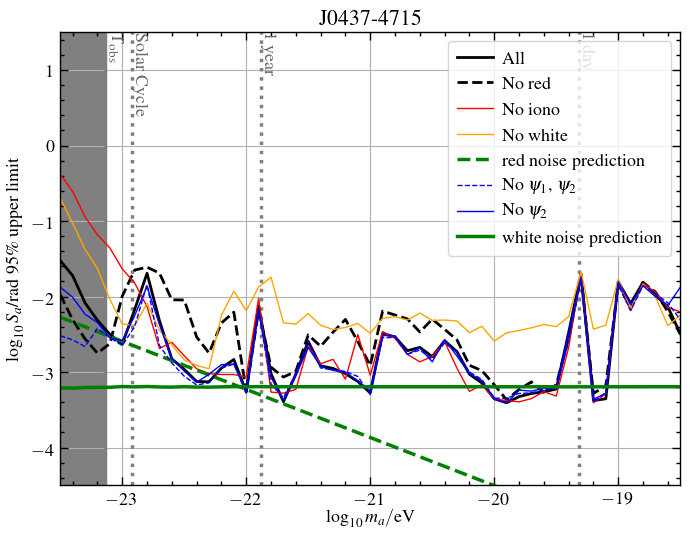

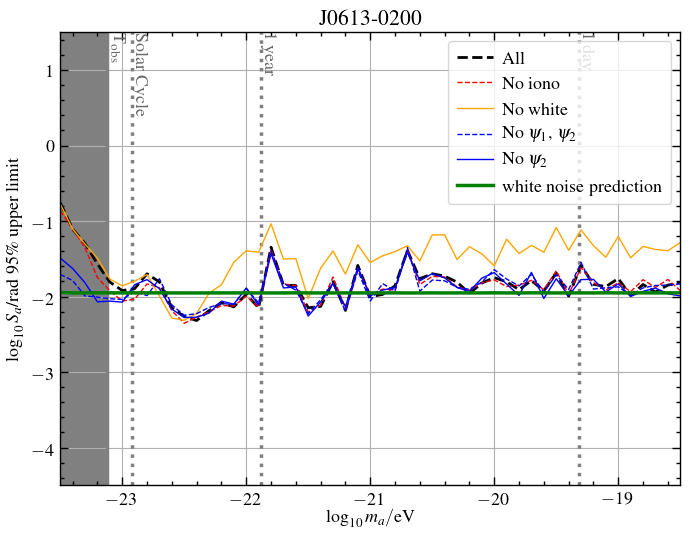

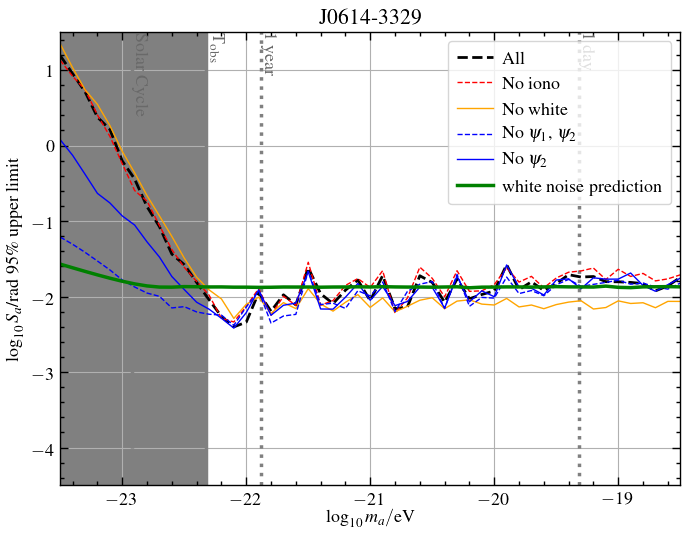

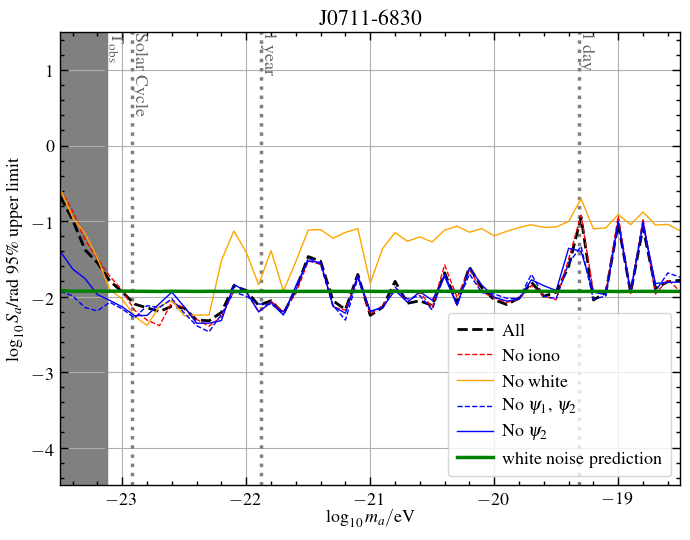

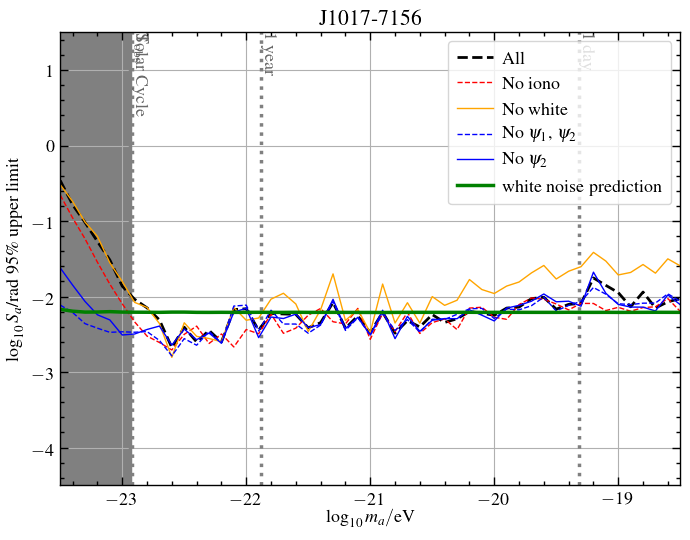

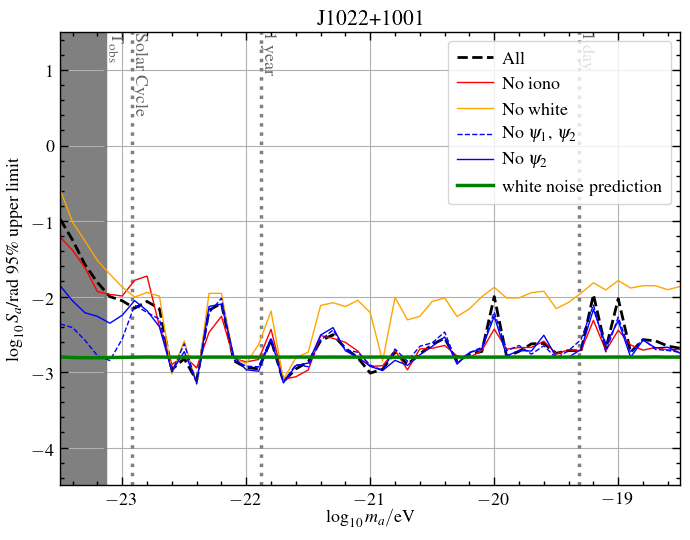

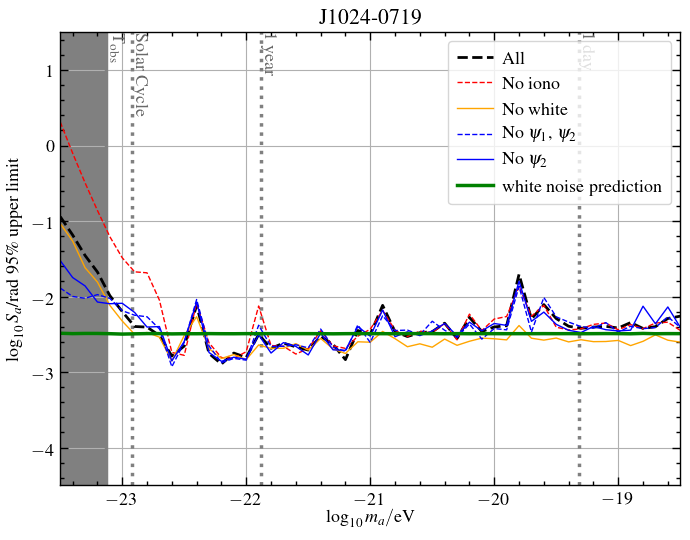

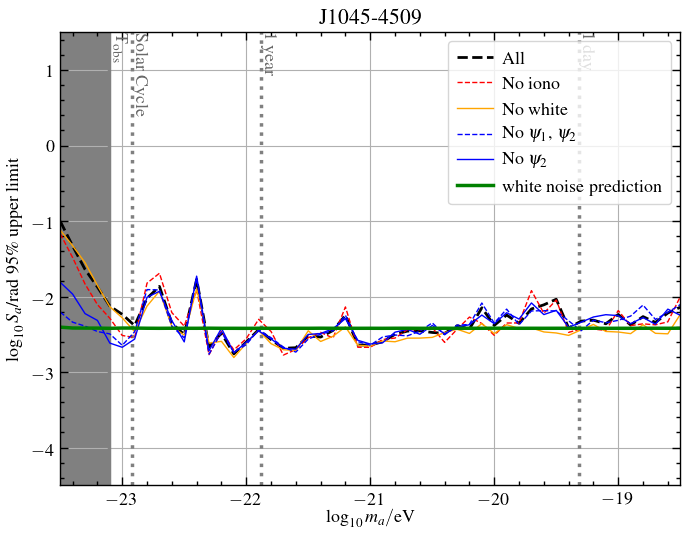

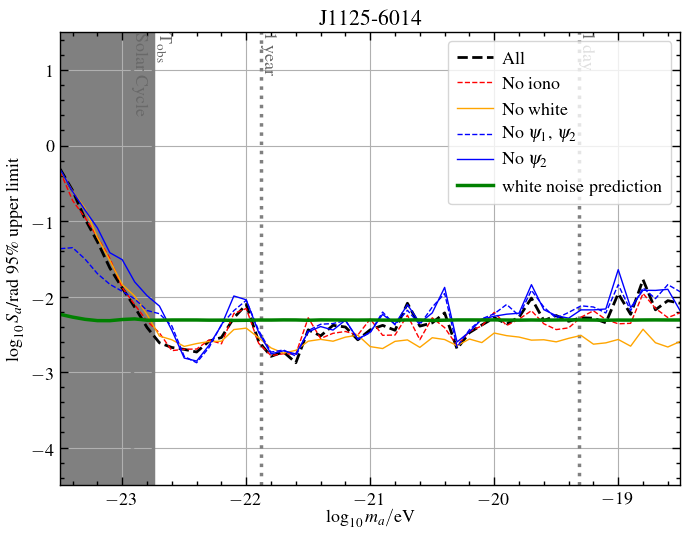

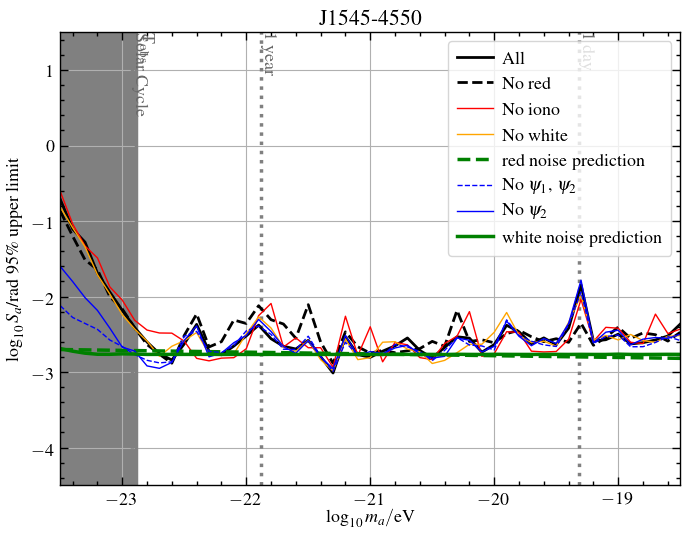

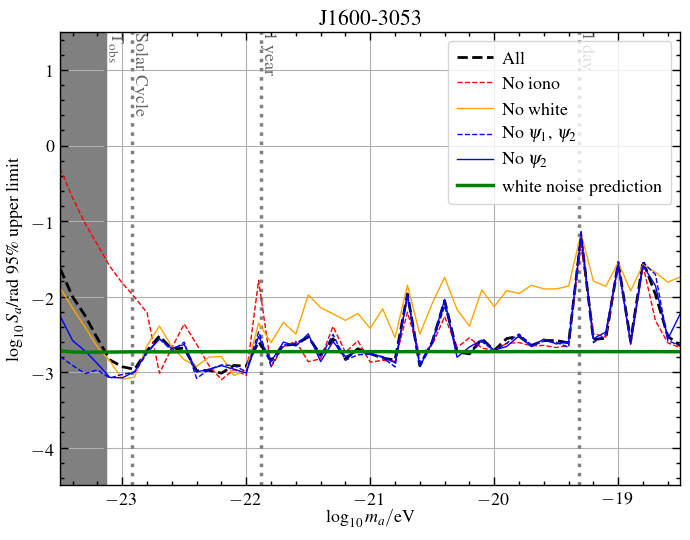

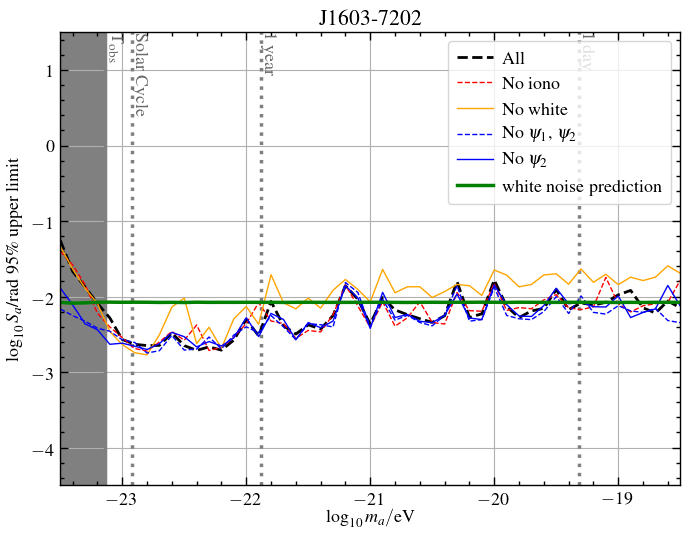

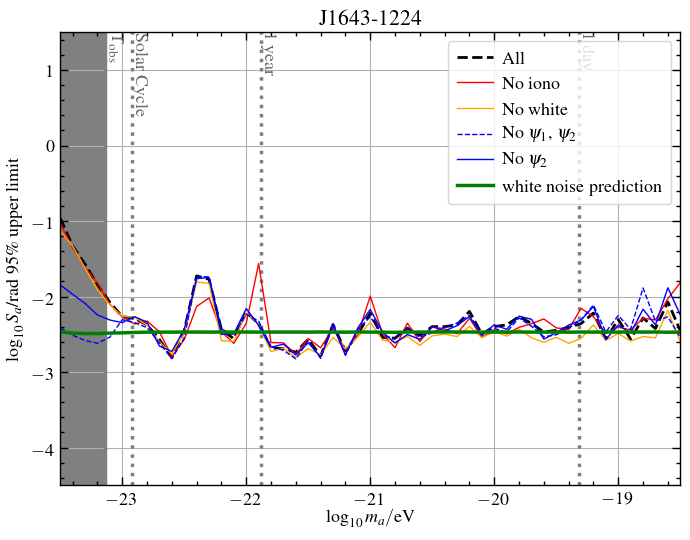

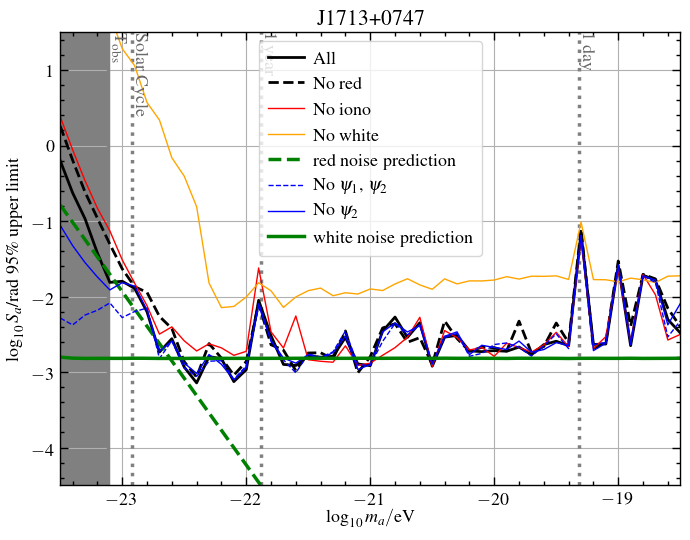

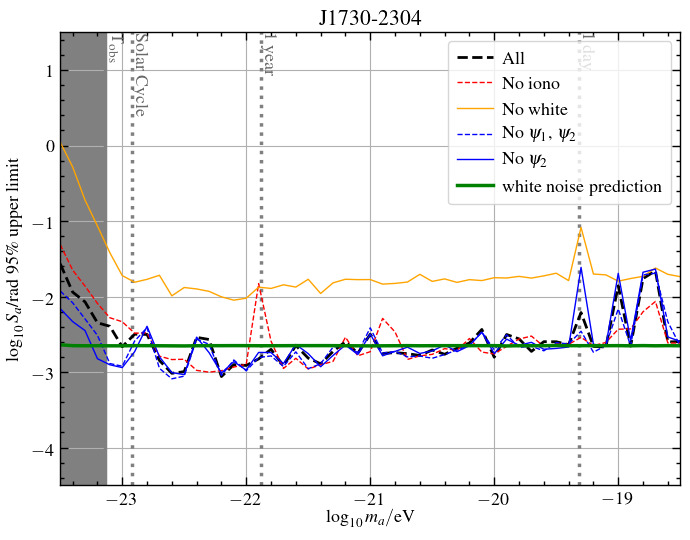

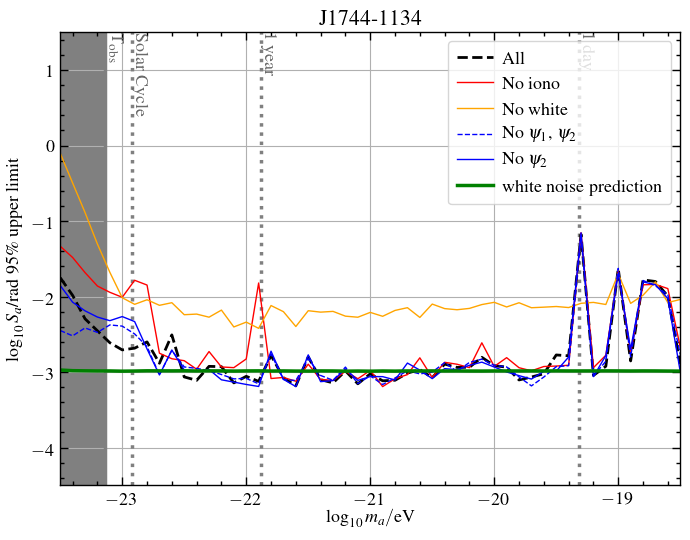

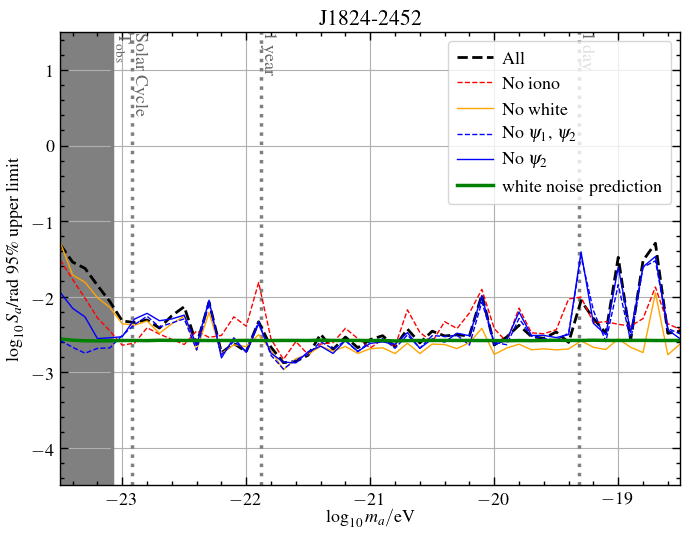

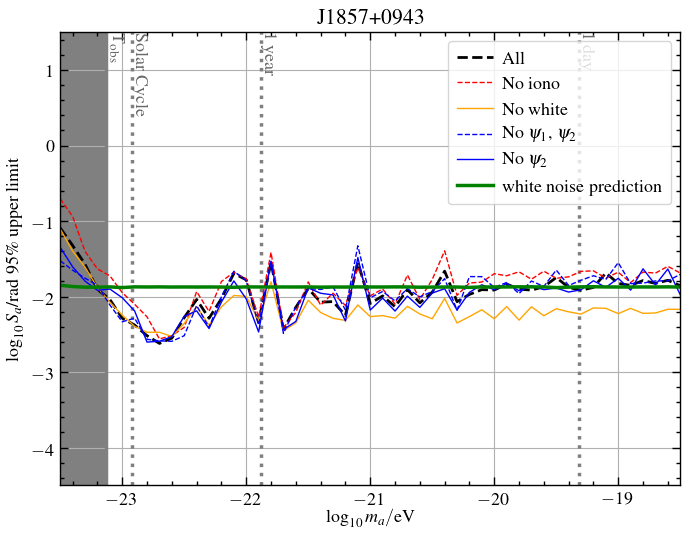

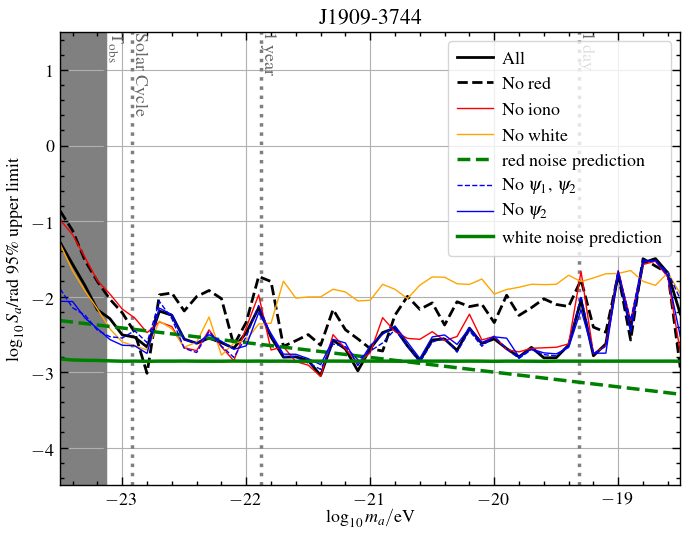

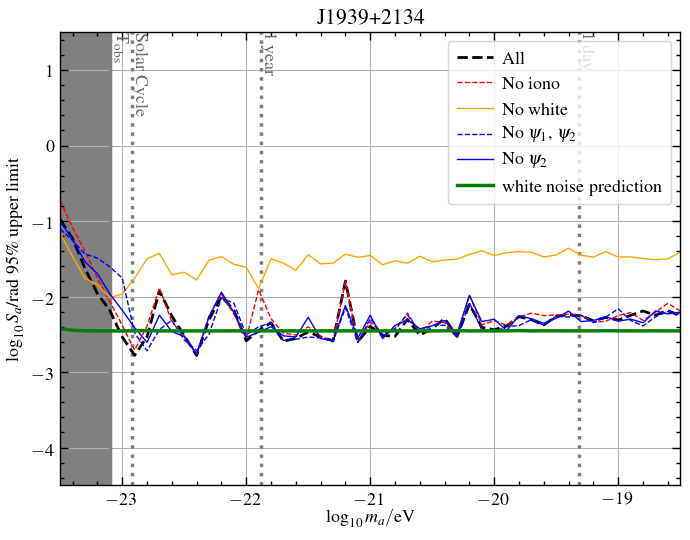

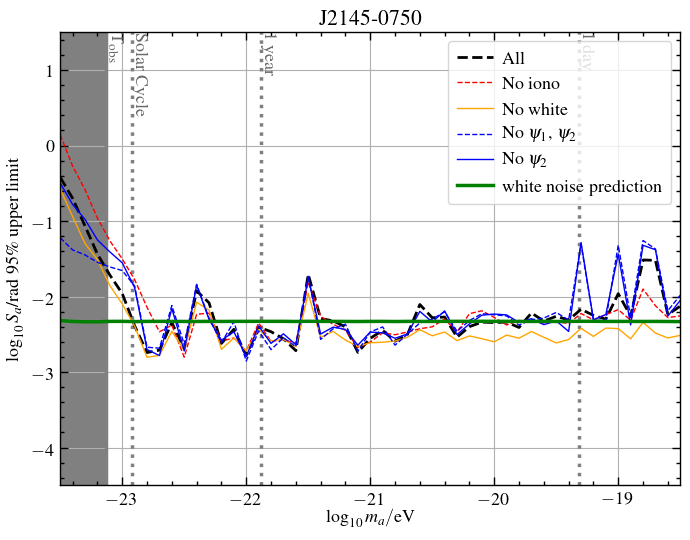

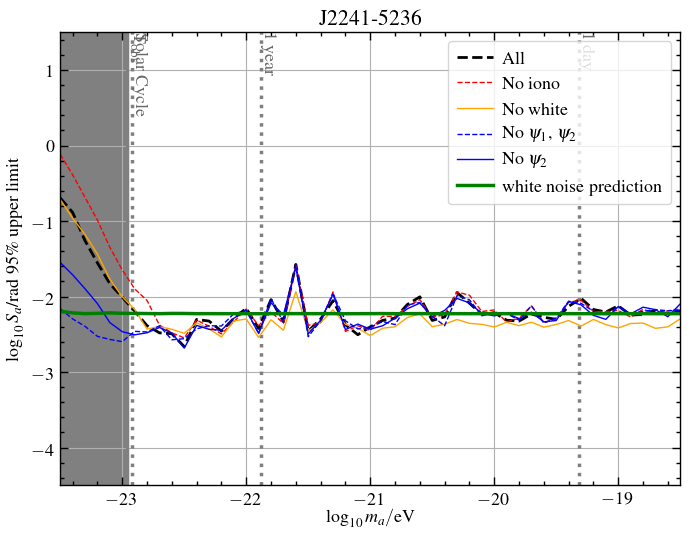

In [13]:
l10ma = np.arange(5,56)*0.1 -24
freqs = MASS_TO_FREQ * 10**l10ma

PSRNS=['J0437-4715', 'J0613-0200', 'J0614-3329', 'J0711-6830', 'J1017-7156', 'J1022+1001', 'J1024-0719', 'J1045-4509', 'J1125-6014', 'J1545-4550', 'J1600-3053', 'J1603-7202', 'J1643-1224', 'J1713+0747', 'J1730-2304', 'J1744-1134', 'J1824-2452', 'J1857+0943', 'J1909-3744', 'J1939+2134', 'J2145-0750', 'J2241-5236']
#PSRNS=['J0437-4715', 'J0613-0200', 'J0614-3329', 'J0711-6830', 'J1017-7156', 'J1022+1001', 'J1024-0719', 'J1045-4509', 'J1713+0747']

for psrn in PSRNS:
    psrn_index = PSRNS.index(psrn)
    # get the noise prediction

    psr=ppa.Pulsar( PSR_DICT[psrn ],iono="ionfr",det_order=2)
    sigma = 1/np.sqrt( np.sum(1/psr.DPA_ERR[0]**2) )
    log10EF , log10Eq , log10Sr , gamma, all_lBF = spa_results[psrn]["ionfr_10cm"]
    EF = 10**log10EF
    EQ = 10**log10Eq
    sigma_new = np.sqrt( sigma**2 *EF**2 + EQ**2  )
    red = 10**log10Sr / np.sqrt(  psr.TOBSs[0] / sc.year ) * ( freqs * sc.year )**(gamma/2)
    vals_original = []
    vals_rescaled = []
    for f in freqs:
        F = psr.get_F_any(psr.TOAs[0],f)
        mtx = F@F.T

        Cw = psr.DPA_ERR[0]**2 #* EF**2 + EQ**2 
        val_original = np.sqrt(np.sqrt(sl.det(sl.inv(mtx).T@(F@np.diag(Cw)@F.T)@sl.inv(mtx))))
        vals_original.append(val_original)

        Cw = psr.DPA_ERR[0]**2 * EF**2 + EQ**2 
        val_rescaled = np.sqrt(np.sqrt(sl.det(sl.inv(mtx).T@(F@np.diag(Cw)@F.T)@sl.inv(mtx))))
        vals_rescaled.append(val_rescaled)      

    
    

    # making plot
    fig,ax = plt.subplots(figsize=(8,6))
    ax.grid()
    ax.set_xlim(-23.5,-18.5)
    ymin = -4.5
    ymax = 1.5
    plot_timescales(ax,ymin,ymax,Tyr = psr.TOBSs[0]/sc.year,annotate=True)
    plt.ylim(ymin,ymax)


    try:
        ax.plot( l10ma , all_data[psrn]["IONFR_T1_T2_W_R"] ,'k-', label="All" , lw=2 )
        ax.plot( l10ma , all_data[psrn]["IONFR_T1_T2_W_NR"] ,'k--', label="No red" , lw=2 )
    except:
        ax.plot( l10ma , all_data[psrn]["IONFR_T1_T2_W_NR"] ,'k--', label="All" , lw=2 )


    try:
        ax.plot( l10ma , all_data[psrn]["NOIONO_T1_T2_W_R"] ,'r-', label="No iono" , lw=1 )
    except:
        ax.plot( l10ma , all_data[psrn]["NOIONO_T1_T2_W_NR"] , 'r--' , label="No iono" , lw=1 )


    try:
        ax.plot( l10ma , all_data[psrn]["IONFR_T1_T2_NW_R"] ,color='orange', label="No white" , lw=1 )
    except:
        pass
    plt.title(psrn)
    
        
    if all_lBF[3]>2.3:
        plt.plot(l10ma , np.log10(red),'g--' ,label="red noise prediction")
        all_data[psrn].update( {  "RED":np.log10(red).tolist()} )
        plt.plot(l10ma , all_data[psrn]["IONFR_NT1_NT2_W_R"],'blue',lw=1,label=r"No $\psi_1$, $\psi_2$",color='blue',ls="--")
        plt.plot(l10ma , all_data[psrn]["IONFR_T1_NT2_W_R"],'blue',lw=1,label=r"No $\psi_2$",color='blue',ls="-")
        #all_data[psrn].update( { "IONFR_T1_NT2_W_R":res[psrn_index]})
    else:
        #all_data[psrn].update( { "IONFR_T1_NT2_W_NR":res[psrn_index]})
        plt.plot(l10ma , all_data[psrn]["IONFR_NT1_NT2_W_NR"],'blue',lw=1,label=r"No $\psi_1$, $\psi_2$",color='blue',ls="--")
        plt.plot(l10ma , all_data[psrn]["IONFR_T1_NT2_W_NR"],'blue',lw=1,label=r"No $\psi_2$",color='blue',ls="-")

    plt.plot(l10ma ,np.log10(vals_rescaled),'g-',label="white noise prediction")
    all_data[psrn].update( {  "WHITE":np.log10(vals_rescaled).tolist()} )
    #all_data[psrn].update( {"IONFR_NOWHITE":all_data[psrn]["IONFR_WHITE"] })
    #all_data[psrn].pop("IONFR_WHITE")


    #plt.plot(l10ma ,np.log10(vals_original),'g--',label="white noise, original")
    
    lgd = ax.legend(ncol=1, handletextpad=0.5, borderpad=0.5, labelspacing=0.5)

    plt.xlabel(r"$\log_{\rm 10}m_a /{\rm eV}$")
    plt.ylabel(r"$\log_{10}S_a$/rad 95\% upper limit")
    plt.fill_betweenx(x1 = l10ma[0],x2 = np.log10(1/(psr.TOBSs[0]*MASS_TO_FREQ)) , y=[ymin,ymax],fc='gray')

    plt.savefig("Figures/spl_"+psrn+".jpg",bbox_inches='tight',dpi=300)



    
    # if psrn !="J0437-4715":
    #     plt.close()

In [12]:
import json
with open("examples/Fig_1_data.json",'w') as f:
    json.dump(all_data,f,indent=1)

In [11]:
# chain = np.loadtxt("chain_1.txt")
# import corner
# for i in range(22):
#     corner.corner( chain[300:,1:-4][:,[0+i,22+i,44+i,66+i]] ,smooth=0,\
#                 labels=[r"$\log_{10}$EF" , r"$\log_{10}$EQ" , r"$\log_{10}S_{\rm red}$",r"$\Gamma$" , r"$D$"],\
#                     show_titles=True);
#     plt.suptitle(PSRNS[i]+r"   $m_a = 10^{-21.5}$eV")

#     #plt.savefig("../Figures/"+PSRNS[i]+"_ionfr_10cm_COMBINED")
#     plt.close()